# Mini-project #1
## Neural Networks and Deep Learning

Kasra Borazjani - 810196662 \\
Hamid Salemi - 810196479

## Question 2 - CNN


In [ ]:
import torch
import torchvision
import torchvision.transforms as transforms

In [ ]:
transform = transforms.Compose([transforms.ToTensor(),transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

batch_size = 8

trainset = torchvision.datasets.CIFAR10(root='./data', train=True, download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=batch_size, shuffle=True, num_workers=2)

testset = torchvision.datasets.CIFAR10(root='./data', train=False, download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=batch_size, shuffle=False, num_workers=2)
classes = ('plane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

Files already downloaded and verified
Files already downloaded and verified


In [ ]:
import torch.nn as nn
import torch.nn.functional as f

class network(nn.Module):
  def __init__(self):
    super().__init__()
    self.conv1 = nn.Conv2d(3, 6, 3)
    self.conv2 = nn.Conv2d(6, 12, 3)
    self.conv3 = nn.Conv2d(12, 36, 3)
    self.pool = nn.MaxPool2d(2,2)
    self.fc1 = nn.Linear(36*2*2, 150)
    self.fc2 = nn.Linear(150, 10)

  def forward(self, input):
    # print("input shape is: {}".format(input.shape))
    input = self.pool(f.relu(self.conv1(input)))
    #print("layer one passed")
    #print("input shape is: {}".format(input.shape))
    input = self.pool(f.relu(self.conv2(input)))
    #print("layer two passed")
    #print("input shape is: {}".format(input.shape))
    input = self.pool(f.relu(self.conv3(input)))
    #print("layer three passed \n input shape is: {}".format(input.shape))
    input = torch.flatten(input, 1)
    input = f.relu(self.fc1(input))
    input = self.fc2(input)

    return input
    
net = network()

import torch.optim as optim

crit = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0.9)

In [ ]:
losses = []
tr_accuracy = []
ts_accuracy = []
for epoch in range(10):

  tr_correct = 0
  tr_total = 0
  for i, tr_data in enumerate(trainloader, 0):
    tr_inputs, tr_labels = tr_data
    optimizer.zero_grad()
    tr_outputs = net(tr_inputs)
    _, tr_predict = torch.max(tr_outputs,1)
    tr_total += tr_labels.size(0)
    tr_correct += (tr_predict == tr_labels).sum().item()
    loss = crit(tr_outputs, tr_labels)
    loss.backward()
    optimizer.step()

  ts_correct = 0
  ts_total = 0
  with torch.no_grad():
    for ts_data in testloader:
      ts_images, ts_labels = ts_data
      ts_outputs = net(ts_images)
      _, ts_predicted = torch.max(ts_outputs.data,1)
      ts_total += ts_labels.size(0)
      ts_correct += (ts_predicted == ts_labels).sum().item()
  
  tr_acc = tr_correct / tr_total * 100
  ts_acc = ts_correct / ts_total * 100
  tr_accuracy.append(tr_acc)
  ts_accuracy.append(ts_acc)
  
  print("epoch {}, train accuracy = {}, test accuracy = {}".format(epoch, tr_acc, ts_acc))
  

print("finished training")


  File "/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py", line 1324, in __del__
Exception ignored in: <function _MultiProcessingDataLoaderIter.__del__ at 0x7f3e37a427a0>
Traceback (most recent call last):
    self._shutdown_workers()
  File "/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py", line 1316, in _shutdown_workers
Exception ignored in: <function _MultiProcessingDataLoaderIter.__del__ at 0x7f3e37a427a0>
    if w.is_alive():
Traceback (most recent call last):
  File "/usr/lib/python3.7/multiprocessing/process.py", line 151, in is_alive
    assert self._parent_pid == os.getpid(), 'can only test a child process'
AssertionError: can only test a child process
  File "/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py", line 1324, in __del__
    self._shutdown_workers()
  File "/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py", line 1316, in _shutdown_workers
    if w.is_alive():
  File "/usr/lib/pytho

epoch 0, train accuracy = 68.094, test accuracy = 62.2
epoch 1, train accuracy = 69.104, test accuracy = 63.74999999999999
epoch 2, train accuracy = 69.67999999999999, test accuracy = 63.18
epoch 3, train accuracy = 70.00999999999999, test accuracy = 64.09
epoch 4, train accuracy = 70.584, test accuracy = 64.2
epoch 5, train accuracy = 71.212, test accuracy = 64.3
epoch 6, train accuracy = 71.628, test accuracy = 64.47
epoch 7, train accuracy = 72.11, test accuracy = 64.57000000000001
epoch 8, train accuracy = 72.414, test accuracy = 63.470000000000006
epoch 9, train accuracy = 73.048, test accuracy = 64.3
finished training


Text(0, 0.5, 'epochs')

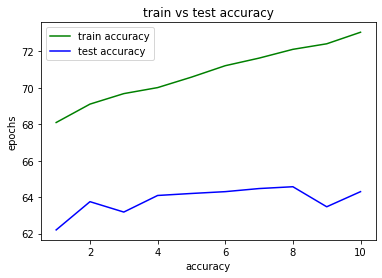

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline

x = range(1,11)
plt.plot(x, tr_accuracy, label='train accuracy', color='green')
plt.plot(x, ts_accuracy, label='test accuracy', color = 'blue')
plt.legend()
plt.title('train vs test accuracy')
plt.xlabel('accuracy')
plt.ylabel('epochs')

In [ ]:
class network2(nn.Module):
  def __init__(self):
    super().__init__()
    self.conv1 = nn.Conv2d(3, 6, 3)
    self.conv2 = nn.Conv2d(6, 12, 3)
    self.conv3 = nn.Conv2d(12, 36, 3)
    self.pool = nn.MaxPool2d(2,2)
    self.fc1 = nn.Linear(36*2*2, 150)
    self.fc2 = nn.Linear(150, 10)

  def forward(self, input):
    # print("input shape is: {}".format(input.shape))
    input = self.pool(f.tanh(self.conv1(input)))
    #print("layer one passed")
    #print("input shape is: {}".format(input.shape))
    input = self.pool(f.tanh(self.conv2(input)))
    #print("layer two passed")
    #print("input shape is: {}".format(input.shape))
    input = self.pool(f.tanh(self.conv3(input)))
    #print("layer three passed \n input shape is: {}".format(input.shape))
    input = torch.flatten(input, 1)
    input = f.tanh(self.fc1(input))
    input = self.fc2(input)

    return input


class network3(nn.Module):
  def __init__(self):
    super().__init__()
    self.conv1 = nn.Conv2d(3, 6, 3)
    self.conv2 = nn.Conv2d(6, 12, 3)
    self.conv3 = nn.Conv2d(12, 36, 3)
    self.pool = nn.MaxPool2d(2,2)
    self.fc1 = nn.Linear(36*2*2, 150)
    self.fc2 = nn.Linear(150, 10)

  def forward(self, input):
    # print("input shape is: {}".format(input.shape))
    input = self.pool(f.sigmoid(self.conv1(input)))
    #print("layer one passed")
    #print("input shape is: {}".format(input.shape))
    input = self.pool(f.sigmoid(self.conv2(input)))
    #print("layer two passed")
    #print("input shape is: {}".format(input.shape))
    input = self.pool(f.sigmoid(self.conv3(input)))
    #print("layer three passed \n input shape is: {}".format(input.shape))
    input = torch.flatten(input, 1)
    input = f.sigmoid(self.fc1(input))
    input = self.fc2(input)

    return input
    


In [ ]:
def train_net(trainloader, testloader, net, crit, optimizer):
  losses = []
  tr_accuracy = []
  ts_accuracy = []
  for epoch in range(10):

    tr_correct = 0
    tr_total = 0
    for i, tr_data in enumerate(trainloader, 0):
      tr_inputs, tr_labels = tr_data
      optimizer.zero_grad()
      tr_outputs = net(tr_inputs)
      _, tr_predict = torch.max(tr_outputs,1)
      tr_total += tr_labels.size(0)
      tr_correct += (tr_predict == tr_labels).sum().item()
      loss = crit(tr_outputs, tr_labels)
      loss.backward()
      optimizer.step()

    ts_correct = 0
    ts_total = 0
    with torch.no_grad():
      for ts_data in testloader:
        ts_images, ts_labels = ts_data
        ts_outputs = net(ts_images)
        _, ts_predicted = torch.max(ts_outputs.data,1)
        ts_total += ts_labels.size(0)
        ts_correct += (ts_predicted == ts_labels).sum().item()
    
    tr_acc = tr_correct / tr_total * 100
    ts_acc = ts_correct / ts_total * 100
    tr_accuracy.append(tr_acc)
    ts_accuracy.append(ts_acc)
    
    print("epoch {}, train accuracy = {}, test accuracy = {}".format(epoch, tr_acc, ts_acc))
    

  print("finished training")
  return tr_accuracy, ts_accuracy


/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:1698: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")


epoch 0, train accuracy = 33.884, test accuracy = 43.93
epoch 1, train accuracy = 46.754, test accuracy = 48.980000000000004
epoch 2, train accuracy = 52.144, test accuracy = 51.970000000000006
epoch 3, train accuracy = 55.291999999999994, test accuracy = 54.1
epoch 4, train accuracy = 57.92, test accuracy = 57.379999999999995
epoch 5, train accuracy = 59.836, test accuracy = 59.45
epoch 6, train accuracy = 61.004000000000005, test accuracy = 58.879999999999995
epoch 7, train accuracy = 62.258, test accuracy = 60.73
epoch 8, train accuracy = 63.186, test accuracy = 61.79
epoch 9, train accuracy = 64.2, test accuracy = 60.96
finished training


/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:1709: UserWarning: nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.
  warnings.warn("nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.")


epoch 0, train accuracy = 9.772, test accuracy = 10.0
epoch 1, train accuracy = 10.13, test accuracy = 10.0
epoch 2, train accuracy = 9.852, test accuracy = 10.0
epoch 3, train accuracy = 9.862, test accuracy = 10.0
epoch 4, train accuracy = 9.758, test accuracy = 10.0
epoch 5, train accuracy = 9.948, test accuracy = 10.0
epoch 6, train accuracy = 9.838, test accuracy = 10.0
epoch 7, train accuracy = 10.018, test accuracy = 10.0
epoch 8, train accuracy = 9.98, test accuracy = 10.0
epoch 9, train accuracy = 10.054, test accuracy = 10.0
finished training


Text(0, 0.5, 'epochs')

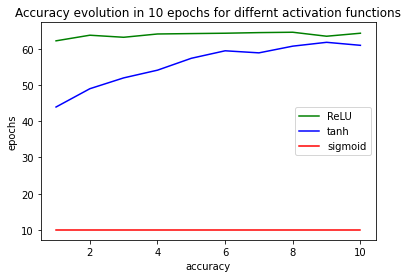

In [ ]:
net2 = network2()
crit2 = nn.CrossEntropyLoss()
optimizer2 = optim.SGD(net2.parameters(), lr=0.001, momentum=0.9)
tr2_accuracy, ts2_accuracy = train_net(trainloader, testloader, net2, crit2, optimizer2)

net3 = network3()
crit3 = nn.CrossEntropyLoss()
optimizer3 = optim.SGD(net3.parameters(), lr=0.001, momentum=0.9)
tr3_accuracy, ts3_accuracy = train_net(trainloader, testloader, net3, crit3, optimizer3)


plt.plot(x, ts_accuracy, label='ReLU', color='green')
plt.plot(x, ts2_accuracy, label='tanh', color = 'blue')
plt.plot(x, ts3_accuracy, label='sigmoid', color = 'red')
plt.legend()
plt.title('Accuracy evolution in 10 epochs for differnt activation functions')
plt.xlabel('accuracy')
plt.ylabel('epochs')

epoch 0, train accuracy = 41.954, test accuracy = 50.73
epoch 1, train accuracy = 53.862, test accuracy = 55.63
epoch 2, train accuracy = 57.542, test accuracy = 56.31
epoch 3, train accuracy = 59.94199999999999, test accuracy = 59.24
epoch 4, train accuracy = 61.756, test accuracy = 59.86
epoch 5, train accuracy = 63.017999999999994, test accuracy = 61.67
epoch 6, train accuracy = 64.242, test accuracy = 61.339999999999996
epoch 7, train accuracy = 65.18, test accuracy = 63.160000000000004
epoch 8, train accuracy = 66.314, test accuracy = 62.53999999999999
epoch 9, train accuracy = 66.804, test accuracy = 62.28
finished training


Text(0, 0.5, 'epochs')

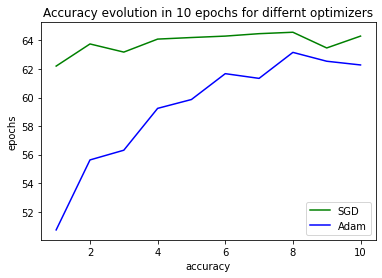

In [ ]:
net4 = network()
crit4 = nn.CrossEntropyLoss()
optimizer4 = optim.Adam(net4.parameters(), lr=0.001)
tr4_accuracy, ts4_accuracy = train_net(trainloader, testloader, net4, crit4, optimizer4)



plt.plot(x, ts_accuracy, label='SGD', color='green')
plt.plot(x, ts4_accuracy, label='Adam', color = 'blue')
plt.legend()
plt.title('Accuracy evolution in 10 epochs for differnt optimizers')
plt.xlabel('accuracy')
plt.ylabel('epochs')

In [ ]:
import pandas as pd
import random
import numpy as np


class_idx = {}
for i in range(len(trainset.targets)):
  if trainset.targets[i] not in class_idx.keys():
    class_idx[trainset.targets[i]] = []
  class_idx[trainset.targets[i]].append(trainset.data[i])

new_trainset= pd.DataFrame()
i = 0
j = 0
for key in class_idx.keys():
  new_data = random.sample(class_idx[key], 600)
  for data in new_data:
    temp_pd = pd.DataFrame([[data, key]], columns=["data", "target"])
    new_trainset= pd.concat([new_trainset, temp_pd])
    j += 1
  i += 1

print(new_trainset)


                                                 data  target
0   [[[228, 204, 147], [214, 187, 137], [183, 143,...       6
0   [[[164, 127, 107], [156, 106, 86], [160, 106, ...       6
0   [[[73, 81, 61], [81, 91, 68], [81, 94, 63], [4...       6
0   [[[46, 50, 28], [46, 49, 28], [46, 50, 28], [4...       6
0   [[[163, 148, 123], [158, 142, 114], [154, 137,...       6
..                                                ...     ...
0   [[[28, 34, 22], [41, 47, 33], [14, 20, 7], [18...       0
0   [[[126, 190, 235], [118, 183, 227], [107, 179,...       0
0   [[[120, 120, 100], [120, 121, 100], [120, 121,...       0
0   [[[149, 152, 161], [147, 150, 159], [147, 150,...       0
0   [[[209, 224, 239], [209, 225, 240], [209, 225,...       0

[6000 rows x 2 columns]


In [ ]:
new_trainloader = torch.utils.data.DataLoader(new_trainset.to_dict(), batch_size=batch_size, shuffle=True, num_workers=2)
print(new_trainloader)

In [ ]:
net5 = network()
crit5 = nn.CrossEntropyLoss()
optimizer5 = optim.Adam(net5.parameters(), lr=0.001)
tr5_accuracy, ts5_accuracy = train_net(new_trainloader, testloader, net5, crit5, optimizer5)



plt.plot(x, tr5_accuracy, label='train', color='green')
plt.plot(x, ts5_accuracy, label='test', color = 'blue')
plt.legend()
plt.title('train vs test accuracy in 10 epochs')
plt.xlabel('accuracy')
plt.ylabel('epochs')

In [ ]:
class network4(nn.Module):
  def __init__(self):
    super().__init__()
    self.conv1 = nn.Conv2d(3, 6, 4)
    self.conv2 = nn.Conv2d(6, 12, 4)
    self.conv3 = nn.Conv2d(12, 36, 4)
    self.pool = nn.MaxPool2d(2,2)
    self.fc1 = nn.Linear(36*1*1, 150)
    self.fc2 = nn.Linear(150, 10)

  def forward(self, input):
    # print("input shape is: {}".format(input.shape))
    input = self.pool(f.relu(self.conv1(input)))
    #print("layer one passed")
    #print("input shape is: {}".format(input.shape))
    input = self.pool(f.relu(self.conv2(input)))
    #print("layer two passed")
    #print("input shape is: {}".format(input.shape))
    input = self.pool(f.relu(self.conv3(input)))
    #print("layer three passed \n input shape is: {}".format(input.shape))
    input = torch.flatten(input, 1)
    input = f.relu(self.fc1(input))
    input = self.fc2(input)

    return input
    
net6 = network4()

import torch.optim as optim

crit6 = nn.CrossEntropyLoss()
optimizer6 = optim.SGD(net6.parameters(), lr=0.001, momentum=0.9)

epoch 0, train accuracy = 25.03, test accuracy = 38.72
epoch 1, train accuracy = 42.662, test accuracy = 44.65
epoch 2, train accuracy = 49.686, test accuracy = 52.01
epoch 3, train accuracy = 54.138, test accuracy = 54.24
epoch 4, train accuracy = 56.936, test accuracy = 55.879999999999995
epoch 5, train accuracy = 59.065999999999995, test accuracy = 58.28
epoch 6, train accuracy = 60.275999999999996, test accuracy = 60.11
epoch 7, train accuracy = 61.196, test accuracy = 60.29
epoch 8, train accuracy = 61.980000000000004, test accuracy = 59.89
epoch 9, train accuracy = 62.748000000000005, test accuracy = 59.0
finished training


Text(0, 0.5, 'epochs')

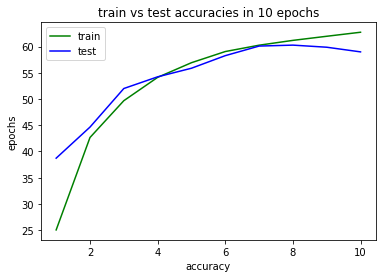

In [ ]:
tr6_accuracy, ts6_accuracy = train_net(trainloader, testloader, net6, crit6, optimizer6)



plt.plot(x, tr6_accuracy, label='train', color='green')
plt.plot(x, ts6_accuracy, label='test', color = 'blue')
plt.legend()
plt.title('train vs test accuracies in 10 epochs')
plt.xlabel('accuracy')
plt.ylabel('epochs')

epoch 0, train accuracy = 31.612000000000002, test accuracy = 39.86
epoch 1, train accuracy = 42.724000000000004, test accuracy = 46.6
epoch 2, train accuracy = 46.938, test accuracy = 47.92
epoch 3, train accuracy = 49.452, test accuracy = 49.93
epoch 4, train accuracy = 51.636, test accuracy = 52.7
epoch 5, train accuracy = 52.916, test accuracy = 53.81
epoch 6, train accuracy = 54.093999999999994, test accuracy = 54.03
epoch 7, train accuracy = 54.718, test accuracy = 53.71
epoch 8, train accuracy = 55.391999999999996, test accuracy = 54.74
epoch 9, train accuracy = 55.992, test accuracy = 55.36
finished training


Text(0, 0.5, 'epochs')

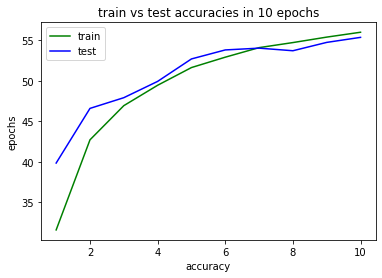

In [114]:
class network5(nn.Module):
  def __init__(self, dout):
    super().__init__()
    self.conv1 = nn.Conv2d(3, 6, 3)
    self.conv2 = nn.Conv2d(6, 12, 3)
    self.conv3 = nn.Conv2d(12, 36, 3)
    self.pool = nn.MaxPool2d(2,2)
    self.fc1 = nn.Linear(36*2*2, 150)
    self.fc2 = nn.Linear(150, 10)
    self.dropout = nn.Dropout(dout)

  def forward(self, input):
    # print("input shape is: {}".format(input.shape))
    input = self.pool(self.dropout(f.relu(self.conv1(input))))
    #print("layer one passed")
    #print("input shape is: {}".format(input.shape))
    input = self.pool(self.dropout(f.relu(self.conv2(input))))
    #print("layer two passed")
    #print("input shape is: {}".format(input.shape))
    input = self.pool(self.dropout(f.relu(self.conv3(input))))
    #print("layer three passed \n input shape is: {}".format(input.shape))
    input = torch.flatten(input, 1)
    input = self.dropout(f.relu(self.fc1(input)))
    input = self.fc2(input)

    return input
    
net7 = network5(0.3)

import torch.optim as optim

crit7 = nn.CrossEntropyLoss()
optimizer7 = optim.SGD(net7.parameters(), lr=0.001, momentum=0.9)

tr7_accuracy, ts7_accuracy = train_net(trainloader, testloader, net7, crit7, optimizer7)



plt.plot(x, tr7_accuracy, label='train', color='green')
plt.plot(x, ts7_accuracy, label='test', color = 'blue')
plt.legend()
plt.title('train vs test accuracies in 10 epochs')
plt.xlabel('accuracy')
plt.ylabel('epochs')

## Question 3 - Data Augmentation

In [ ]:
import tensorflow as tf
import os
from google.colab import drive

drive.mount('/content/gdrive')
root_path = 'gdrive/My Drive/NNDL - Spring 00/'
os.chdir(root_path)

In [119]:
os.chdir('Mini Projects/MP1/')
image = tf.keras.preprocessing.image.load_img('test.jpg', grayscale=False, color_mode="rgb", target_size=None, interpolation="nearest")